In [1]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namanjoshi0313","key":"fe8b1b10b8e8b5c1f5bc8e70a8882c05"}'}

In [3]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


In [4]:
!kaggle datasets download -d aniruddhsharma/structural-defects-network-concrete-crack-images


Dataset URL: https://www.kaggle.com/datasets/aniruddhsharma/structural-defects-network-concrete-crack-images
License(s): other
structural-defects-network-concrete-crack-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip structural-defects-network-concrete-crack-images.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Walls/Non-cracked/7117-203.jpg  
  inflating: /content/Walls/Non-cracked/7117-204.jpg  
  inflating: /content/Walls/Non-cracked/7117-205.jpg  
  inflating: /content/Walls/Non-cracked/7117-206.jpg  
  inflating: /content/Walls/Non-cracked/7117-207.jpg  
  inflating: /content/Walls/Non-cracked/7117-208.jpg  
  inflating: /content/Walls/Non-cracked/7117-21.jpg  
  inflating: /content/Walls/Non-cracked/7117-211.jpg  
  inflating: /content/Walls/Non-cracked/7117-212.jpg  
  inflating: /content/Walls/Non-cracked/7117-213.jpg  
  inflating: /content/Walls/Non-cracked/7117-214.jpg  
  inflating: /content/Walls/Non-cracked/7117-215.jpg  
  inflating: /content/Walls/Non-cracked/7117-216.jpg  
  inflating: /content/Walls/Non-cracked/7117-217.jpg  
  inflating: /content/Walls/Non-cracked/7117-218.jpg  
  inflating: /content/Walls/Non-cracked/7117-219.jpg  
  inflating: /content/Walls/Non-cracked/7117-22.jpg  
  inflating: /co

In [16]:
# Part 1: Before Training (Dataset Setup & Model Initialization)

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from tqdm.notebook import tqdm
import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Configuration
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
NUM_WORKERS = 2
BASE_DIR = '/content/Pavements'  # Path to your dataset folder
SAVE_DIR = './models'
os.makedirs(SAVE_DIR, exist_ok=True)

# Data transforms
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load full dataset using ImageFolder
full_dataset = datasets.ImageFolder(
    BASE_DIR,
    transform=train_transform
)

# Split dataset into training and validation (80% train, 20% validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print(f"Dataset sizes: Train={len(train_dataset)}, Val={len(val_dataset)}")

# Model creation
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 1),
    nn.Sigmoid()
)
model = model.to(device)

# Training components
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)

# Training statistics storage
train_losses = []
val_losses = []
train_accs = []
val_accs = []
best_val_acc = 0

print("Setup complete. Ready to start training.")


Using device: cuda
Dataset sizes: Train=19467, Val=4867
Setup complete. Ready to start training.


Starting training...


Epoch 1/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 1/10:
Train Loss: 0.3082, Train Acc: 0.8994
Val Loss: 0.2910, Val Acc: 0.9166
Epoch Time: 136.63s
Current LR: 0.001000


Epoch 2/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 2/10:
Train Loss: 0.2551, Train Acc: 0.9124
Val Loss: 0.2501, Val Acc: 0.9184
Epoch Time: 122.77s
Current LR: 0.001000


Epoch 3/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 3/10:
Train Loss: 0.2421, Train Acc: 0.9161
Val Loss: 0.2461, Val Acc: 0.9038
Epoch Time: 121.48s
Current LR: 0.001000


Epoch 4/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 4/10:
Train Loss: 0.2240, Train Acc: 0.9230
Val Loss: 0.2530, Val Acc: 0.9147
Epoch Time: 123.76s
Current LR: 0.001000


Epoch 5/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 5/10:
Train Loss: 0.2205, Train Acc: 0.9254
Val Loss: 0.2505, Val Acc: 0.9211
Epoch Time: 121.18s
Current LR: 0.001000


Epoch 6/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 6/10:
Train Loss: 0.2135, Train Acc: 0.9289
Val Loss: 0.2149, Val Acc: 0.9264
Epoch Time: 123.42s
Current LR: 0.001000


Epoch 7/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 7/10:
Train Loss: 0.2072, Train Acc: 0.9303
Val Loss: 0.2021, Val Acc: 0.9225
Epoch Time: 121.36s
Current LR: 0.001000


Epoch 8/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 8/10:
Train Loss: 0.2043, Train Acc: 0.9299
Val Loss: 0.1926, Val Acc: 0.9340
Epoch Time: 122.71s
Current LR: 0.001000


Epoch 9/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 9/10:
Train Loss: 0.1963, Train Acc: 0.9340
Val Loss: 0.1876, Val Acc: 0.9330
Epoch Time: 121.85s
Current LR: 0.001000


Epoch 10/10:   0%|          | 0/609 [00:00<?, ?it/s]


Epoch 10/10:
Train Loss: 0.1858, Train Acc: 0.9358
Val Loss: 0.2109, Val Acc: 0.9318
Epoch Time: 124.29s
Current LR: 0.001000


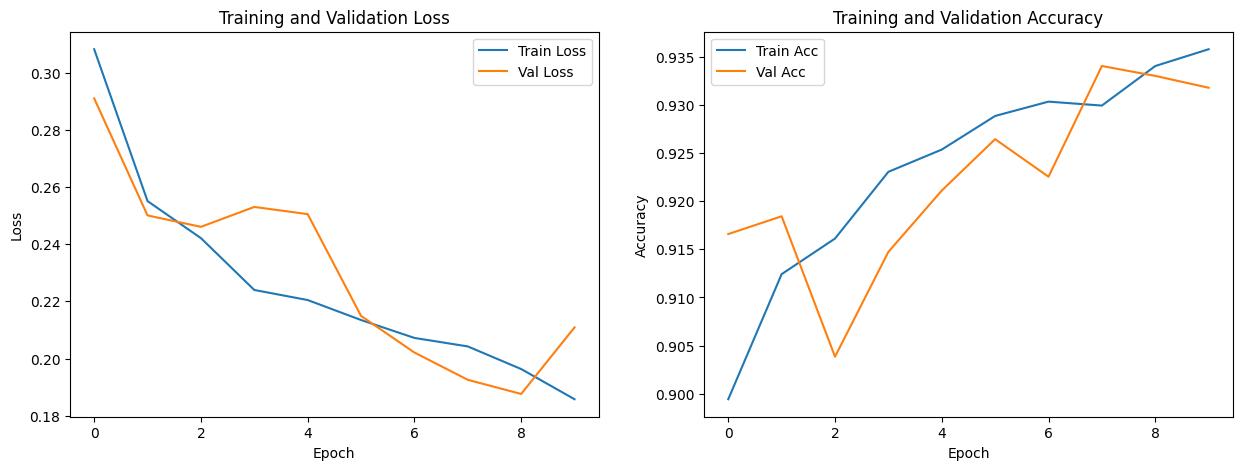

In [17]:
# Part 2: Training (Training Loop)

print("Starting training...")

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Training progress bar
    pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{EPOCHS}')
    processed_images = 0
    epoch_start = time.time()

    for inputs, targets in pbar:
        inputs, targets = inputs.to(device), targets.float().to(device)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        processed_images += len(inputs)

        # Update progress bar
        pbar.set_postfix({
            'loss': f'{running_loss/processed_images:.3f}',
            'acc': f'{100.*correct/total:.2f}%',
            'images': processed_images
        })

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.float().to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, targets)

            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            val_total += targets.size(0)
            val_correct += (predicted == targets).sum().item()

    # Calculate epoch metrics
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = correct / total
    epoch_val_loss = val_loss / len(val_loader)
    epoch_val_acc = val_correct / val_total
    epoch_time = time.time() - epoch_start

    # Store metrics
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)
    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)

    # Update scheduler
    scheduler.step(epoch_val_acc)

    # Save best model
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        torch.save(model.state_dict(), os.path.join(SAVE_DIR, 'best_model.pth'))

    print(f'\nEpoch {epoch+1}/{EPOCHS}:')
    print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}')
    print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}')
    print(f'Epoch Time: {epoch_time:.2f}s')
    print(f'Current LR: {optimizer.param_groups[0]["lr"]:.6f}')

# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [18]:
# Part 3: After Training (Evaluation and Results)

# Load best model for evaluation
model.load_state_dict(torch.load(os.path.join(SAVE_DIR, 'best_model.pth')))
model.eval()

# Detailed evaluation on the test set
test_predictions = []
test_targets = []
test_probas = []

test_loader = DataLoader(
    full_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

with torch.no_grad():
    for inputs, targets in tqdm(test_loader, desc='Evaluating test set'):
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        predictions = (outputs > 0.5).float()

        test_predictions.extend(predictions.cpu().numpy())
        test_targets.extend(targets.numpy())
        test_probas.extend(outputs.cpu().numpy())

# Convert to numpy arrays
import numpy as np
test_predictions = np.array(test_predictions)
test_targets = np.array(test_targets)
test_probas = np.array(test_probas)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_targets, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Crack', 'Crack'],
            yticklabels=['Non-Crack', 'Crack'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(test_targets, test_predictions,
                          target_names=['Non-Crack', 'Crack']))

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_targets, test_probas)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Visualize test predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
test_loader_iter = iter(test_loader)
batch_inputs, batch_targets = next(test_loader_iter)

for i in range(min(10, len(batch_inputs))):
    plt.subplot(2, 5, i+1)
    img = batch_inputs[i].permute(1, 2, 0).numpy()
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)

    with torch.no_grad():
        output = model(batch_inputs[i:i+1].to(device)).item()

    true_label = batch_targets[i].item()
    pred_label = int(output > 0.5)

    plt.imshow(img)
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f'True: {"Crack" if true_label else "Non-Crack"}\n'
              f'Pred: {"Crack" if pred_label else "Non-Crack"}\n'
              f'Conf: {output:.2f}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Model Performance:")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Output hidden; open in https://colab.research.google.com to view.

In [19]:
# Save the trained model after training is complete
torch.save(model.state_dict(), os.path.join(SAVE_DIR, 'pavement_crack_model.pth'))
print("Model saved successfully!")


Model saved successfully!


In [6]:
BASE_DIR = '/content/structural-defects-network-concrete-crack-images/Pavements'